In [3]:
import sys
# Confirm that we're using Python 3
assert sys.version_info.major == 3, 'Oops, not running Python 3. Use Runtime > Change runtime type'

In [4]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
# TensorFlow and tf.keras
print("Installing dependencies for Colab environment")
!pip install -Uq grpcio==1.26.0

import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess

print('TensorFlow version: {}'.format(tf.__version__))

Installing dependencies for Colab environment
TensorFlow version: 2.12.0


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0
(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [ ]:
from keras.utils import np_utils
train_labels = np_utils.to_categorical(train_labels, 10)
test_labels = np_utils.to_categorical(test_labels, 10)
print(train_labels.shape)
print(test_labels)

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [19]:
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D


model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
________________________________________________

In [21]:
model.compile(optimizer='adam', loss = 'mean_squared_error', metrics=['accuracy'])
#model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=)

In [22]:
testing = False
epochs = 10
(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)
model.fit(train_images, train_labels, epochs=epochs, batch_size=100)

Epoch 1/10
600/600 [==============================] - 36s 58ms/step - loss: 0.0096 - accuracy: 0.9382
Epoch 2/10
600/600 [==============================] - 36s 59ms/step - loss: 0.0034 - accuracy: 0.9790
Epoch 3/10
600/600 [==============================] - 35s 59ms/step - loss: 0.0024 - accuracy: 0.9852
Epoch 4/10
600/600 [==============================] - 37s 61ms/step - loss: 0.0018 - accuracy: 0.9897
Epoch 5/10
600/600 [==============================] - 40s 67ms/step - loss: 0.0014 - accuracy: 0.9922
Epoch 6/10
600/600 [==============================] - 35s 58ms/step - loss: 0.0011 - accuracy: 0.9937
Epoch 7/10
600/600 [==============================] - 34s 57ms/step - loss: 9.5047e-04 - accuracy: 0.9944
Epoch 8/10
600/600 [==============================] - 35s 59ms/step - loss: 7.2066e-04 - accuracy: 0.9959
Epoch 9/10
600/600 [==============================] - 36s 60ms/step - loss: 6.6994e-04 - accuracy: 0.9962
Epoch 10/10
600/600 [==============================] - 37s 61ms/step -

In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 8ms/step - loss: 0.0025 - accuracy: 0.9830


In [24]:
print("model, accuracy: {:5.2f}%".format(100*test_acc))

model, accuracy: 98.30%


In [25]:
import tempfile

MODEL_DIR = tempfile.gettempdir()
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

print('\nSaved model:')
!ls -l {export_path}

export_path = /tmp/1




Saved model:
total 140
drwxr-xr-x 2 root root   4096 Apr 25 18:51 assets
-rw-r--r-- 1 root root     59 Apr 25 18:51 fingerprint.pb
-rw-r--r-- 1 root root  11959 Apr 25 18:51 keras_metadata.pb
-rw-r--r-- 1 root root 117605 Apr 25 18:51 saved_model.pb
drwxr-xr-x 2 root root   4096 Apr 25 18:51 variables


In [26]:
!saved_model_cli show --dir {export_path} --all

2023-04-25 18:51:47.677642: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['conv2d_input'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 28, 28, 1)
        name: serving_default_conv2d_input:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['dense_1'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 10)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predi

In [27]:
import sys
# We need sudo prefix if not on a Google Colab.
if 'google.colab' not in sys.modules:
  SUDO_IF_NEEDED = 'sudo'
else:
  SUDO_IF_NEEDED = ''

1/1 [==============================] - 0s 198ms/step
[[1.4481007e-08 6.8794650e-09 5.7927127e-06 8.3991763e-05 1.1382327e-08
  6.4601052e-10 3.0418823e-12 9.9990511e-01 5.0559618e-07 4.5061665e-06]]
1/1 [==============================] - 0s 109ms/step
Prediction:  0
Prediction:  0
Prediction:  0
Prediction:  0
Prediction:  0
Prediction:  0
Prediction:  0
Prediction:  0
Prediction:  0
Prediction:  0


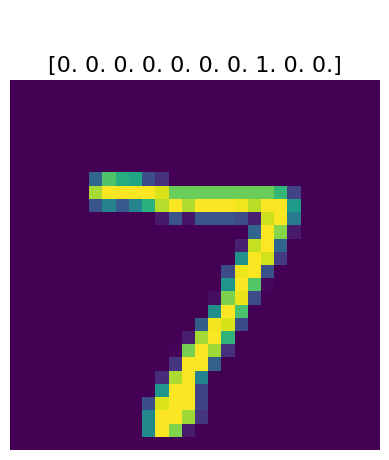

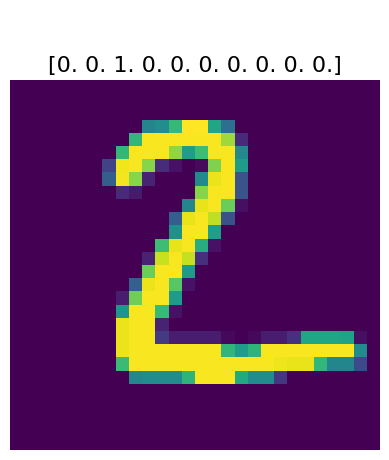

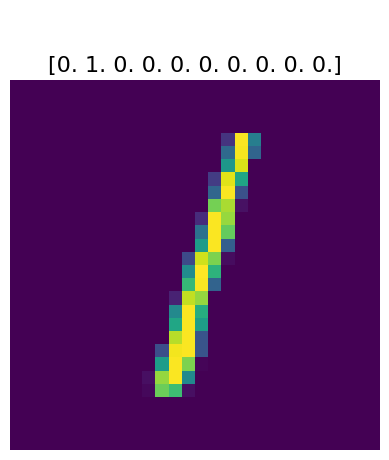

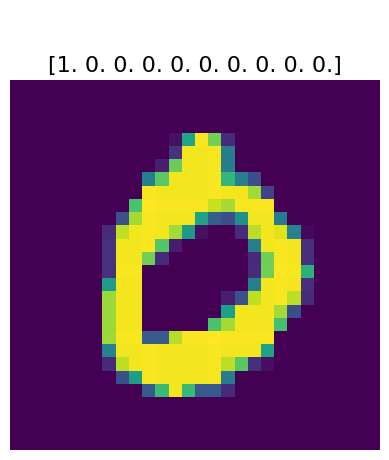

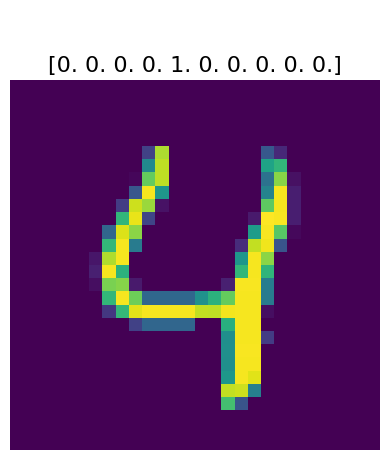

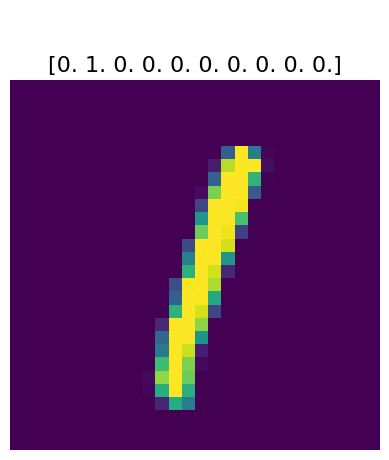

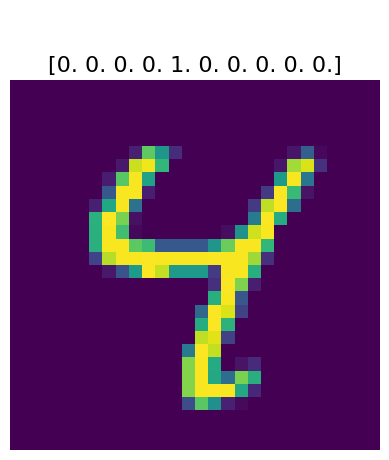

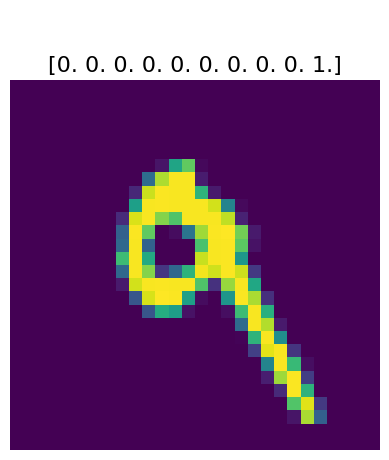

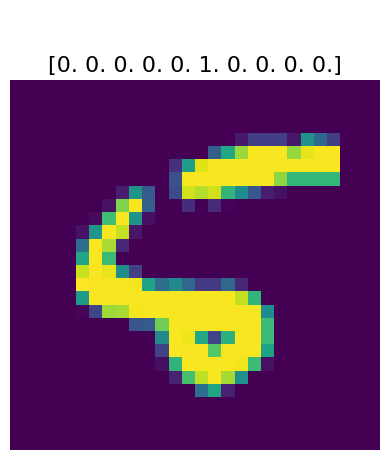

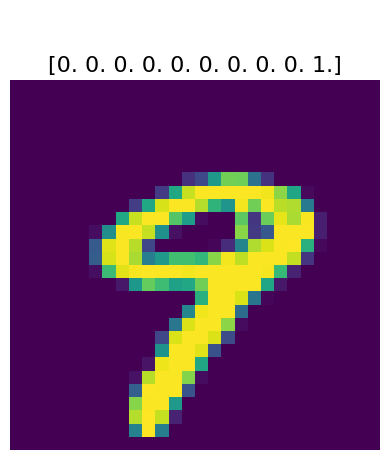

In [28]:
# import load_model
from tensorflow.keras.models import load_model
import numpy as np

import tensorflow as tf
tf.compat.v1.estimator

# give the path to model directory to load the model

export_path
loaded_model = load_model(export_path)

# predict function to predict the probabilities for each class 0-9
y_predict= loaded_model.predict(test_images[0:1])
print(y_predict)

# predict_classes to get the class with highest probability 
y_predict = np.argmax(model.predict(test_images[1:11]), axis=-1)

from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline
import random

def show(idx, title):
    plt.figure()
    plt.imshow(test_images[idx].reshape(28,28))
    plt.axis('off')
    plt.title('\n\n{}'.format(test_labels[idx]), fontdict={'size': 16})

for i, prediction in enumerate(y_predict):
    print("Prediction: ",np.argmax(prediction))
    show(i,test_images[i])

In [29]:
os.environ["MODEL_DIR"] = MODEL_DIR
print('TensorFlow version: {}'.format(tf.__version__))

TensorFlow version: 2.12.0


In [30]:
# This is the same as you would do from your command line, but without the [arch=amd64], and no sudo
# You would instead do:
# echo "deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | sudo tee /etc/apt/sources.list.d/tensorflow-serving.list && \
# curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | sudo apt-key add -

!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | {SUDO_IF_NEEDED} tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | {SUDO_IF_NEEDED} apt-key add -
!{SUDO_IF_NEEDED} apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  28298      0 --:--:-- --:--:-- --:--:-- 28298
OK
Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:2 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,026 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease
Get:5 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:7 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:8 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server

In [31]:
# TODO: Use the latest model server version when colab supports it.
#!{SUDO_IF_NEEDED} apt-get install tensorflow-model-server
# We need to install Tensorflow Model server 2.8 instead of latest version
# Tensorflow Serving >2.9.0 required `GLIBC_2.29` and `GLIBCXX_3.4.26`. Currently colab environment doesn't support latest version of`GLIBC`,so workaround is to use specific version of Tensorflow Serving `2.8.0` to mitigate issue.
!wget 'http://storage.googleapis.com/tensorflow-serving-apt/pool/tensorflow-model-server-2.8.0/t/tensorflow-model-server/tensorflow-model-server_2.8.0_all.deb'
!dpkg -i tensorflow-model-server_2.8.0_all.deb
!pip3 install tensorflow-serving-api==2.8.0

--2023-04-25 18:52:39--  http://storage.googleapis.com/tensorflow-serving-apt/pool/tensorflow-model-server-2.8.0/t/tensorflow-model-server/tensorflow-model-server_2.8.0_all.deb
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 2607:f8b0:4023:c0b::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 340152790 (324M) [application/x-debian-package]
Saving to: ‘tensorflow-model-server_2.8.0_all.deb’

tensorflow-model-se 100%[===================>] 324.39M  71.9MB/s    in 5.1s    

2023-04-25 18:52:45 (64.1 MB/s) - ‘tensorflow-model-server_2.8.0_all.deb’ saved [340152790/340152790]

Selecting previously unselected package tensorflow-model-server.
(Reading database ... 122400 files and directories currently installed.)
Preparing to unpack tensorflow-model-server_2.8.0_all.deb ...
Unpacking tensorflow-model-server (2.8.0) ...
Setting up tensorflow

In [33]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=mist_prediction \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

In [34]:
!tail server.log

2023-04-25 18:53:05.467502: E external/org_tensorflow/tensorflow/core/grappler/optimizers/meta_optimizer.cc:828] tfg_optimizer{} failed: NOT_FOUND: Op type not registered 'DisableCopyOnRead' in binary running on a1ee57573664. Make sure the Op and Kernel are registered in the binary running in this process. Note that if you are loading a saved graph which used ops from tf.contrib, accessing (e.g.) `tf.contrib.resampler` should be done before importing the graph, as contrib ops are lazily registered when the module is first accessed.
	when importing GraphDef to MLIR module in GrapplerHook
2023-04-25 18:53:05.527175: E external/org_tensorflow/tensorflow/core/grappler/optimizers/meta_optimizer.cc:828] tfg_optimizer{} failed: NOT_FOUND: Op type not registered 'DisableCopyOnRead' in binary running on a1ee57573664. Make sure the Op and Kernel are registered in the binary running in this process. Note that if you are loading a saved graph which used ops from tf.contrib, accessing (e.g.) `tf.co

In [36]:
import json
data = json.dumps({"signature_name": "serving_default", "instances": test_images[0:3].tolist()})
print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))

Data: {"signature_name": "serving_default", "instances": ...  [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]]]]}


In [38]:
# docs_infra: no_execute
!pip install -q requests

import requests
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/mist_prediction:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)['predictions']

show(0, 'The model thought this was a {} (class {}), and it was actually a {} (class {})'.format(
  class_names[np.argmax(predictions[0])], np.argmax(predictions[0]), class_names[test_labels[0]], test_labels[0]))

ConnectionError: ignored